# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How will the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# read csv and inspect data shape
import pandas as pd
data = pd.read_csv('data/human_body_temperature.csv')
data.shape

(130, 3)

In [2]:
# inspect the data
data.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Question 1: Is the distribution of body temperatures normal?
We will inspect the data to have an idea of its distribution shape

In [3]:
# plot the column "temperature" to see its shape
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

p=norm.pdf(data.temperature, data.temperature.mean(), data.temperature.std())

plt.hist(data.temperature, bins=20, density='3.1', stacked=True)
plt.plot(data.temperature, p)
plt.xlabel('Human Body Temperature ($^\circ$F)')
plt.ylabel('Frequency')
plt.show()

<Figure size 640x480 with 1 Axes>

We see that the shape of the data looks similar to a normal distribution; although not homogeneous

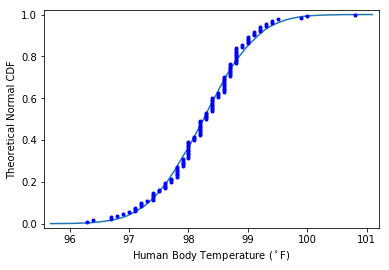

In [4]:
# plot the cumulative distribution function (CDF)
t_mean = np.mean(data['temperature'])
t_std = np.std(data['temperature'])
t_samples = np.random.normal(t_mean, t_std, size=10000)

def ecdf(data_f):
    n = len(data_f)
    x = np.sort(data_f)
    y= np.arange(1, n+1)/n
    return x, y

x_obs, y_obs = ecdf(data['temperature'])
x_theor, y_theor = ecdf(t_samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_obs, y_obs, marker='.', linestyle = 'none', color='blue')
_ = plt.margins(0.02)
_ = plt.xlabel('Human Body Temperature ($^\circ$F)')
_ = plt.ylabel('Theoretical Normal CDF')

The observed data points are very close to the theoretical data points. 
We observe that there are few data points on the right hand side of the distribution, which we observed previously. 
Nevertheless, this graph confirms even more the normal distribution of body temperature. 

In [5]:
# test if the sample population follows a normal distribution
from scipy import stats
stats.normaltest(data.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

We get a p-value of 0.26 > 0.05. We can confirm H0 that the sample population follows a normal distribution.

<p> Conclusion: the sample data is normally distributed as the distribution looks symmetrical, the cumulative distributive function (CDF) of the sample data is very close to the theoretical CDF and a hypothesis test confirms that the sample data follows a normal distribution </p>

## Question 2: Is the sample size large? Are the observations independent?

Sample size is 130, which is bigger then 30. Therefore, the sample size is large enough

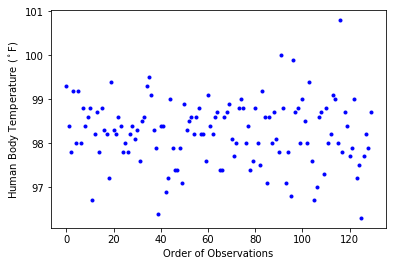

In [6]:
# plot the body temperature data points 
plt.plot(data.index, data.temperature, marker=".", linestyle='none', color='blue')
plt.xlabel('Order of Observations')
plt.ylabel('Human Body Temperature ($^\circ$F)')
plt.show()

The data points seem to be independent according their distribution on the graph above.

## Question 3: Is the true population mean really 98.6 degrees F?

Hypothesis testing: 
<p> H0: true population temperature mean is equal to 98.6 F </p>
<p> H1: true population temperature mean is not equal to 98.6 F </p>

1) first, let's try a bootstrap hypothesis test

In [7]:
bootstrap = np.empty(10000)

for i in range(10000):
    bootstrap_t = np.random.choice(data.temperature, size = len(data.temperature))
    bootstrap [i] = np.mean(bootstrap_t)

b = np.sum(bootstrap >= 98.6)/len(bootstrap)
print(b)
np.percentile(bootstrap, [2.5, 97.5])

0.0


array([98.12230769, 98.37540385])

2) now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

A One-Sample hypothesis test compares a sample mean and a known population mean to determine whether the difference between the two means is statistically significant or occurred by chance alone.
A two-sample hypothesis test compares two sample means from different populations regarding the same variable to determine whether the difference between the two means is statistically significant or occurred by chance alone.

We will use a one sample hypothesis test because we have only one data set and we are comparing a sample mean and a known population mean. 

3) In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?

We should use a z-test because n > 30 (n=130)

In [8]:
# z-stat
from statsmodels.stats.weightstats import ztest
z = ztest(data.temperature, value=98.6)
print("Z-score is equal to: %6.3F p-value equal to: %6.9F" % (abs(z[0]), z[1]))

Z-score is equal to:  5.455 p-value equal to: 0.000000049


We get a p-value < 0.025, therefore we can reject H0 that the true population temperature mean is equal to 98.6 F. 

4) Now try using the other test. How will the result be different? Why?

In [9]:
# t-stat
numerator = data.temperature.mean()-98.6
denominator = data.temperature.std()/(data.temperature.size**0.5)

t = numerator/denominator
print(t)

-5.454823292364079


The result is the same between t-stat and z-stat because the sample size is large. 

## Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

#### Which one is the correct one to use?
#### What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

When sample size is below 30, we use the t-test

In [10]:
sample = np.random.choice(data['temperature'], size=10)

In [11]:
# t-stat
numerator = sample.mean()-98.6
denominator = sample.std()/(sample.size**0.5)

t_10 = numerator/denominator
print(t_10)

p = 1 - stats.t.cdf(t_10, df= 2*10-2)
print(p)

-0.8915828832078919
0.8078098947181648


In [12]:
z_stat, p_val_z = ztest(x1 = sample, value = 98.6)
print(z_stat)
print(p_val_z)

-0.8458297901270488
0.39764770418761963


We obtain different results between z-test and t-test when the sample size is below 30. In the t-test, p-value is > 0.05, therefore not significant. In the z-test, the p-value is < 0.05, therefore significant. This illustrates 

## Question 5: At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [13]:
#hypothesis: 95% confidence level
std_dev_obs = t_std/np.sqrt(130)

CI = [t_mean - abs(1.96*std_dev_obs), t_mean + abs(1.96*std_dev_obs)]
print(CI)

[98.12367980442819, 98.37478173403336]


The normal human body temperature is between 98.12 F and 98.37 F. 
Therefore, temperatures below 98.12 F and above 98.37 F are considered abnormal. 

## Question 6: Is there a significant difference between males and females in normal temperature?

H0: male temperature = female temperature 
H1: male temp != female temp

#### What testing approach did you use and why?
I will use the t-test approach because we are testing the mean of two sets of data that are significantly different


In [14]:
from scipy.stats import ttest_ind
t_test = ttest_ind(data.temperature[data.gender == 'M'],data.temperature[data.gender == 'F'])
print(t_test)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)


We get a p-value < 0.025
Therefore we can reject H0 and conclude that there is a significant difference between males and females temperature.

## Conclusion

We just found out that the mean body temperature was significantly different between males and females. The original question was if the mean body temperature was equal to 98.6 F, independently of gender. 